# Diving into the algorithms: Week-2

All Machine Learning algorithms can be broadly into following categories:
* **Supervised Learning**: In this category the algorithms build models by training them on labeled datasets. Example: SVM, k-Nearest Neighbor  
* **Unsupervised Learning**: This learning is used when we don't have labeled datasets. Example: Clustering   
* **Reinforcement Learning**: This is hybrid learning. It is mostly used in AI where environments are very dynamic. This type of learning involves states, actions and rewards. Here the models are trained by using the rewards received after performing an action.

# Supervised Learning
In **Supervised Learning**, we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features. A very popular and everyday-in-use example is **spam-mail filtering**.   

Q: **What are features?**  
Features can be understood as summary of some data. Different types of features:
* Numerical: 1.6, 2.8 
* Categorical: red, blue, green 
* Ordinal: Bad, Good, Excellent  

**Note:** Although categorical and ordinal features might look similar but they have a very minor difference. Ordinal features have some order among values like __bad<good<excellent__ and categorical features don't have any order.  

Q: ** What are labels?**  
Labels are class (or categories to which the data belongs like spam or not-spam)

Supervised learning is further broken down into two categories, **classification** and **regression**. In classification, the label is discrete, while in regression, the label is continuous.

## Datasets
* **Training Data**: Labeled dataset which is used to train a model  
* **Test Data**: Dataset for which the labels need to be predicted using the trained model  
* **Validation Data**: Labeled dataset used to evaluate a trained model  

Data: Matrix of size m x n. (m rows and n columns)  
Rows are data points and columns are the features.

In [204]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
print X.shape
print y.shape
print set(y)

(150, 4)
(150,)
set([0, 1, 2])


In [209]:
print type(iris)

<class 'sklearn.datasets.base.Bunch'>


In [ ]:
from IPython.core.display import Image, display
display(Image(filename='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='images/iris_virginica.jpg'))
print("Iris Virginica")

### 4-Steps code to making Machine 'Intelligent' using sklearn
* Import the relevant algorithm module
* Instantiate the algorithm model
* Training on the dataset
* Testing on data

In [208]:
###Demonstrate the code here####
from sklearn import neighbors 

knn = neighbors.KNeighborsClassifier()

knn.fit(X, y)

print iris.target_names[knn.predict([1,2,1,2])]

['setosa']


/Users/sumaniksingh/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


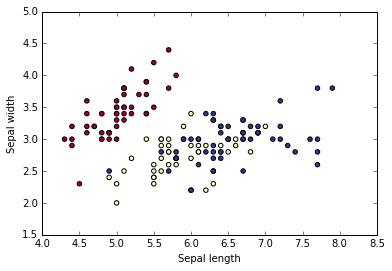

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu');
plt.xlabel('Sepal length')
plt.ylabel('Sepal width');

In [ ]:
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='RdYlBu')
plt.xlabel('Petal length')
plt.ylabel('Petal width');

#### Today's task
Predict which flower has following features: 
* Sepal length = 7 cm
* Sepal width = 3 cm
* Petal length = 5 cm
* Petal width = 1 cm

## Classification

### kNN (k-Nearest Neighbor)
kNN is one of the simplest algorithms and easy to understand machine learning algorithm. Given a new data point to classify, the algorithm looks up in the labeled dataset and finds **k** data points nearest to the test data point. These data points are known as neighbors. Finally the label assigned to the data point is the majority class label among the neighbors.

In [210]:
from sklearn import neighbors

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[7, 3, 5, 1],])
print result
print(iris.target_names[result])

[1]
['versicolor']


In [211]:
print knn.predict_proba([[7, 3, 5, 1],])

[[ 0.  1.  0.]]


### Support Vector Machine
<img src="images/SVM.png" width=50%>  
Basically the algorithm tries to find optimal hyperplane that maximizes the margin between support vectors. Support vectors are the points that are closest to the hyperplane as shown in the figure (points wih circle around them). 
### [Slides on SVM and kernels](http://www.cs.umd.edu/~samir/498/SVM.pdf)

In [215]:
from sklearn import svm

svm_model = svm.SVC(kernel='poly')
svm_model.fit(X, y)
result = svm_model.predict([7, 3, 5, 1])
print result
print iris.target_names[result]

[1]
['versicolor']


/Users/sumaniksingh/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### Decision Trees
<img src="images/DecisionTree.png" width=50%>
**Exercise**  
* Should I play tennis if its *humid* and *sunny* outside?    
* What about if its *raining* but the wind is *weak*?  

### [Slides on Decision Trees](https://ai.vub.ac.be/sites/default/files/ch3.pdf)

In [216]:
from sklearn import tree

DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X, y)
result = DT_model.predict([7, 3, 5, 1])
print result
print iris.target_names[result]

[2]
['virginica']


/Users/sumaniksingh/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### Random Forest
Random forest, as the word suggests, is a group of decision trees.  It is good practice to have decision trees that are only 1 or 2 levels deep in random forest. Even though we only go one or two levels deep in the trees but still it is a very powerful algorithm and has been observed to perform better than Decision trees. There's a very popular saying in the community that   
**"Even the worst model of random forest is more robust than best decision trees."**  

#### Algorithm
* For each tree, we randomly sample with replace ment from training data set and then train the tree on that set
* We do this thing for each tree in the forest.    
Since each tree sees different subset of training dataset which is randomly sampled, that's why it is known as 'random' forest.  
This is also know as **Ensemble Learning** where you take an ensemble of classifiers and then come up with final predicition using the result of each classifier.

In [ ]:
from sklearn import ensemble

RF_model = ensemble.RandomForestClassifier()
RF_model.fit(X, y)
result = RF_model.predict([7, 3, 5, 1])
print result
print iris.target_names[result]

## Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import linear_model

def func_predict(x):
    return 2*x + 5

inp = np.random.uniform(-10,10,10)
out = map(func_predict,inp)

lin_reg_model = linear_model.LinearRegression()
lin_reg_model.fit(inp.reshape(-1,1), out)

print lin_reg_model.coef_
print lin_reg_model.intercept_

In [ ]:
plt.plot(inp,out,'o')
plt.plot(inp,lin_reg_model.predict(inp.reshape(-1,1)));

In [ ]:
def func_predict_with_error(x):
    return 2*x + 5 + np.random.normal(scale=1,size=1)

inp_error = np.random.uniform(-10,10,10)
out_error = map(func_predict_with_error,inp_error)

lin_reg_model_error = linear_model.LinearRegression()
lin_reg_model_error.fit(inp_error.reshape(-1,1), out_error)

print lin_reg_model_error.coef_
print lin_reg_model_error.intercept_


In [ ]:
plt.plot(inp_error, out_error, 'o')
plt.plot(inp_error, lin_reg_model_error.predict(inp_error.reshape(-1,1)));

## Non linear Regression

In [ ]:
from sklearn import metrics

X_nonlinear = np.random.random(size=(10, 1))
Y_nonlinear = 2 * X_nonlinear.squeeze() + 5 + np.random.randn(10)
plt.plot(X_nonlinear, Y_nonlinear,'o');

In [ ]:
lin_model = linear_model.LinearRegression()
lin_model.fit(X_nonlinear, Y_nonlinear)

print "Mean absolute error for linear model: ", metrics.mean_absolute_error(Y_nonlinear, lin_model.predict(X_nonlinear))
plt.plot(X_nonlinear, Y_nonlinear,'o')
plt.plot(X_nonlinear, lin_model.predict(X_nonlinear));

In [ ]:
## Another way is numpy.polyfit
from numpy import linspace
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(X_train, Y_train, deg=2):
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X_train)
    poly_model = linear_model.LinearRegression()
    poly_model.fit(X_poly, Y_train)
    
    x_sample = linspace(0, 1, 200)
    y_sample = poly_model.intercept_
    print y_sample
    print poly_model.coef_
    for i in range(deg+1):
        y_sample +=  poly_model.coef_[i]*x_sample**i
    
    print "Mean absolute error for degree={} is: {}".format(deg, metrics.mean_absolute_error(Y_train, poly_model.predict(X_poly)))
    plt.plot(X_train, Y_train, 'o')
    plt.plot(x_sample, y_sample);
    


In [ ]:
polynomial_regression(X_nonlinear, Y_nonlinear,2)

In [ ]:
polynomial_regression(X_nonlinear, Y_nonlinear,3)

In [ ]:
polynomial_regression(X_nonlinear, Y_nonlinear,4)

In [ ]:
polynomial_regression(X_nonlinear, Y_nonlinear,5)

### Random Forest Regression

In [ ]:
from sklearn import metrics

RF_reg_model = ensemble.RandomForestRegressor()
RF_reg_model.fit(X_nonlinear, Y_nonlinear)
Y_predicted = RF_reg_model.predict(X_nonlinear)
print "Mean absolute error: ", metrics.mean_absolute_error(Y_nonlinear,Y_predicted)